In [1]:
import pandas as pd
from deepface import DeepFace

In [2]:
df = pd.read_csv('dataset/Labeled Faces in the Wild Dataset/master.csv')
df.head()

,file_x,file_y,Decision
0,img20.jpg,img21.jpg,Yes
1,img16.jpg,img17.jpg,Yes
2,img3.jpg,img12.jpg,Yes
3,img22.jpg,img23.jpg,Yes
4,img24.jpg,img25.jpg,Yes


In [45]:
df['file_x'] = 'dataset/' + df['file_x'].astype(str)
df['file_y'] = 'dataset/' + df['file_y'].astype(str)

In [72]:
instances = df[["file_x", "file_y"]].values.tolist()
instances

[['dataset/img20.jpg', 'dataset/img21.jpg'],
 ['dataset/img16.jpg', 'dataset/img17.jpg'],
 ['dataset/img3.jpg', 'dataset/img12.jpg'],
 ['dataset/img22.jpg', 'dataset/img23.jpg'],
 ['dataset/img24.jpg', 'dataset/img25.jpg'],
 ['dataset/img1.jpg', 'dataset/img2.jpg'],
 ['dataset/img1.jpg', 'dataset/img4.jpg'],
 ['dataset/img1.jpg', 'dataset/img5.jpg'],
 ['dataset/img1.jpg', 'dataset/img6.jpg'],
 ['dataset/img1.jpg', 'dataset/img7.jpg'],
 ['dataset/img1.jpg', 'dataset/img10.jpg'],
 ['dataset/img1.jpg', 'dataset/img11.jpg'],
 ['dataset/img2.jpg', 'dataset/img4.jpg'],
 ['dataset/img2.jpg', 'dataset/img5.jpg'],
 ['dataset/img2.jpg', 'dataset/img6.jpg'],
 ['dataset/img2.jpg', 'dataset/img7.jpg'],
 ['dataset/img2.jpg', 'dataset/img10.jpg'],
 ['dataset/img2.jpg', 'dataset/img11.jpg'],
 ['dataset/img4.jpg', 'dataset/img5.jpg'],
 ['dataset/img4.jpg', 'dataset/img6.jpg'],
 ['dataset/img4.jpg', 'dataset/img7.jpg'],
 ['dataset/img4.jpg', 'dataset/img10.jpg'],
 ['dataset/img4.jpg', 'dataset/img11.jpg

In [37]:
model_name = "VGG-Face"
distance_metric = "cosine"

In [39]:
resp_obj = DeepFace.verify(instances, model_name = model_name, distance_metric = distance_metric)





Verification:   0%|          | 0/300 [00:00<?, ?it/s]



Verification:   0%|          | 1/300 [00:04<20:56,  4.20s/it]



Verification:   1%|          | 2/300 [00:05<16:55,  3.41s/it]



Verification:   1%|          | 3/300 [00:09<17:03,  3.44s/it]



Verification:   1%|▏         | 4/300 [00:13<17:46,  3.60s/it]



Verification:   2%|▏         | 5/300 [00:15<15:20,  3.12s/it]



Verification:   2%|▏         | 6/300 [00:18<15:50,  3.23s/it]



Verification:   2%|▏         | 7/300 [00:22<17:07,  3.51s/it]



Verification:   3%|▎         | 8/300 [00:25<15:48,  3.25s/it]



Verification:   3%|▎         | 9/300 [00:28<15:20,  3.16s/it]



Verification:   3%|▎         | 10/300 [00:32<16:21,  3.39s/it]



Verification:   4%|▎         | 11/300 [00:35<15:18,  3.18s/it]



Verification:   4%|▍         | 12/300 [00:37<14:48,  3.08s/it]



Verification:   4%|▍         | 13/300 [00:41<15:37,  3.27s/it]



Verification:   5%|▍         | 14/300 [00:44<14:21,  3.01s/it]



Verification:   5%|▌    

Verification:  41%|████▏     | 124/300 [04:48<06:14,  2.13s/it]



Verification:  42%|████▏     | 125/300 [04:50<05:59,  2.05s/it]



Verification:  42%|████▏     | 126/300 [04:52<06:08,  2.12s/it]



Verification:  42%|████▏     | 127/300 [04:56<07:47,  2.70s/it]



Verification:  43%|████▎     | 128/300 [05:02<10:01,  3.50s/it]



Verification:  43%|████▎     | 129/300 [05:04<08:43,  3.06s/it]



Verification:  43%|████▎     | 130/300 [05:07<08:56,  3.15s/it]



Verification:  44%|████▎     | 131/300 [05:11<09:39,  3.43s/it]



Verification:  44%|████▍     | 132/300 [05:14<09:36,  3.43s/it]



Verification:  44%|████▍     | 133/300 [05:16<08:20,  3.00s/it]



Verification:  45%|████▍     | 134/300 [05:18<06:56,  2.51s/it]



Verification:  45%|████▌     | 135/300 [05:23<08:42,  3.17s/it]



Verification:  45%|████▌     | 136/300 [05:27<09:47,  3.58s/it]



Verification:  46%|████▌     | 137/300 [05:32<10:47,  3.97s/it]



Verification:  46%|████▌     | 138/300 [05:35<10:18,  3.82s/it

In [40]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)

In [46]:
df["distance"] = distances
df.head()

,file_x,file_y,Decision,distance
0,dataset/img20.jpg,dataset/img21.jpg,Yes,0.0772
1,dataset/img16.jpg,dataset/img17.jpg,Yes,0.2317
2,dataset/img3.jpg,dataset/img12.jpg,Yes,0.2811
3,dataset/img22.jpg,dataset/img23.jpg,Yes,0.2294
4,dataset/img24.jpg,dataset/img25.jpg,Yes,0.0811


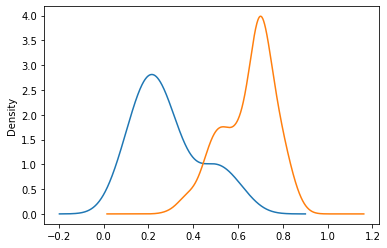

In [50]:
df[df.Decision == "Yes"].distance.plot.kde()
df[df.Decision == "No"].distance.plot.kde()

In [56]:
#pip install chefboost
from chefboost import Chefboost as chef

In [57]:
config = {'algorithm': 'C4.5'}

In [59]:
tmp_df = df[['distance', 'Decision']].rename(columns = {"decision": "Decision"}).copy()
model = chef.fit(tmp_df, config)

[INFO]:  2 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.4929940700531006  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  94.66666666666667 % on  300  instances
Labels:  ['Yes' 'No']
Confusion matrix:  [[22, 0], [16, 262]]
Precision:  100.0 %, Recall:  57.8947 %, F1:  73.3333 %


In [60]:
threshold = 0.2592 #comes from c4.5 algorithm

In [61]:
df["prediction"] = "No"

In [62]:
idx = df[df.distance <= threshold].index
df.loc[idx, 'prediction'] = 'Yes'

In [63]:
df.sample(5)

,file_x,file_y,Decision,distance,prediction
201,dataset/img24.jpg,dataset/img5.jpg,No,0.8285,No
80,dataset/img20.jpg,dataset/img8.jpg,No,0.6771,No
50,dataset/img20.jpg,dataset/img24.jpg,No,0.5480,No
31,dataset/img7.jpg,dataset/img11.jpg,Yes,0.3407,No
279,dataset/img7.jpg,dataset/img9.jpg,No,0.5337,No


In [65]:
from sklearn.metrics import confusion_matrix

In [67]:
cm = confusion_matrix(df.Decision.values, df.prediction.values)

In [68]:
tn, fp, fn, tp = cm.ravel()

In [69]:
tn, fp, fn, tp

(262, 0, 16, 22)

In [70]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

In [71]:
print("Precision: ", 100*precision,"%")
print("Recall: ", 100*recall,"%")
print("F1 score ",100*f1, "%")
print("Accuracy: ", 100*accuracy,"%")

Precision:  100.0 %
Recall:  57.89473684210527 %
F1 score  73.33333333333334 %
Accuracy:  94.66666666666667 %
